# **PROBLEM STATEMENT**

Lack of a clear strategy to offer the right type of product tailored to the target customer segment.

# **OBJECTIVE**

To develop a clustering model to identify product ownership patterns based on the demographics of existing FundFusion customers, with a Silhouette Score greater than 0.7.

# **AVAILABLE VARIABLES**

From the available dataset, the following variables are provided:


**1. GCIF                     :** Unique Customer Identifier\
**2. Area                     :** Customer Location (Jakarta, Bogor, Bandung, Surabaya, Jogja, Solo)\
**3. Jalur_Pembukaan          :** Customer touch points when opening a product → Branch, Telemarketing, Digital App, Internet Banking\
**4. Vintage                  :** Duration of being a customer (since account opening)\
**5. Usia                     :** Customer’s Age\
**6. Jenis_Kelamin            :** Male (1) & Female (0)\
**7. Status_Perkawinan        :** Single (0), Married (1), Divorced (2), Widowed (3)\
**8. Jumlah_Anak              :** Number of Children (numeric)\
**9. Pendidikan               :** Highest education level → No Formal Education (0), Elementary (1), Junior High (2), High School (3), Bachelor’s (4), Master’s (5), Doctorate (6)\
**10. Produk_Tabungan         :** Product Ownership Status (Yes/1, No/0)\
**11. Produk_Deposito         :** Product Ownership Status (Yes/1, No/0)\
**12. Produk_Kartu_Kredit     :** Product Ownership Status (Yes/1, No/0)\
**13. Produk_Kredit_Rumah     :** Product Ownership Status (Yes/1, No/0)\
**14. Produk_Kredit_Kendaraan :** Product Ownership Status (Yes/1, No/0)\
**15. Produk_Kredit_Dana_Tunai:** Product Ownership Status (Yes/1, No/0)\
**16. Total_Kepemilikan_Produk:** Total Number of Products Owned (Sum of all product ownerships)\
**17. Pendapatan_Tahunan      :** Average Yearly Income\
**18. Total_Relationship_Balance :** Total Customer Assets at the Observation Cutoff Month

# **EXPERIMENT**

**Point of View:**

1. Grouping based on **demographic attributes** to identify patterns in **product ownership**.  
2. Grouping based on **product ownership** to identify patterns in **demographic characteristics**.

# **CODE**

## **Import Package**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
from sklearn_extra.cluster import KMedoids

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
# Set the option to display all columns when printing a DataFrame
pd.set_option('display.max_columns', None)

## **Data For Clustering**

In [6]:
path_1 = "https://raw.githubusercontent.com/brainspopper/dataset/main/clustering_data.csv"
data = pd.read_csv(path_1)

In [8]:
data.dtypes

GCIF                           object
Area                           object
Jalur_Pembukaan                object
Vintage                        object
Usia                          float64
Jenis_Kelamin                  object
Status_Perkawinan              object
Jumlah_Anak                     int64
Pendidikan                     object
Produk_Tabungan                 int64
Produk_Deposito                 int64
Produk_Kartu_Kredit             int64
Produk_Kredit_Rumah             int64
Produk_Kredit_Kendaraan         int64
Produk_Kredit_Dana_Tunai        int64
Total_Kepemilikan_Produk        int64
Pendapatan_Tahunan              int64
Total_Relationship_Balance      int64
dtype: object

## **Data Understanding**

In [11]:
# Count the number of rows in each group based on the 'Area' column
data.groupby('Area')['Area'].count()

Area
Bandung     6917
Bogor       1191
Jakarta     7017
Jogja       3001
Solo        5001
Surabaya    5002
Name: Area, dtype: int64

In [15]:
# Select only numeric columns from the DataFrame
numeric_cols = data.select_dtypes(include=[np.number])

# Group by the 'Area' column and calculate the mean for each numeric column
mean_values = numeric_cols.groupby(data['Area']).mean()

# Display the result
mean_values

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Area,,,,,,,,,,,
Bandung,42.562310,1.296516,0.925401,0.599682,0.329767,0.587393,0.163076,0.537516,3.142836,405.124910,2.454722e+08
Bogor,42.660451,1.366919,0.921075,0.596977,0.324097,0.582704,0.160369,0.554996,3.140218,402.227540,2.499853e+08
Jakarta,42.696995,1.322930,0.925467,0.603534,0.336184,0.590708,0.169873,0.540829,3.166595,406.478552,2.485876e+08
Jogja,42.512422,1.309897,0.934355,0.608464,0.333555,0.594469,0.158614,0.535155,3.164612,402.694768,2.496616e+08
Solo,42.445452,1.270746,0.922416,0.603479,0.337932,0.604679,0.156969,0.540492,3.165967,408.010198,2.507478e+08
Surabaya,42.768980,1.284486,0.927629,0.608357,0.329668,0.585566,0.168533,0.528589,3.148341,409.074370,2.523277e+08


In [17]:
# Count the number of rows in each group based on the 'Vintage' column
data.groupby('Vintage')['Vintage'].count()

Vintage
2 - 3 Tahun    13953
< 1 Tahun       9278
> 4 Tahun       4898
Name: Vintage, dtype: int64

In [19]:
# Select only numeric columns from the DataFrame
numeric_cols = data.select_dtypes(include=[np.number])

# Group by the 'Vintage' column and calculate the mean for each numeric column
mean_values = numeric_cols.groupby(data['Vintage']).mean()

# Display the result
mean_values

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Vintage,,,,,,,,,,,
2 - 3 Tahun,42.578850,1.291694,0.927256,0.607755,0.328531,0.589336,0.163764,0.539311,3.155952,407.679639,2.489367e+08
< 1 Tahun,42.689341,1.294676,0.931235,0.592585,0.336495,0.594201,0.164798,0.523389,3.142703,395.611231,2.486679e+08
> 4 Tahun,42.571866,1.338301,0.912822,0.613107,0.338914,0.592691,0.163536,0.560637,3.181707,422.593508,2.500646e+08


In [21]:
# Count the number of rows in each group based on the 'Jalur_Pembukaan' column
data.groupby('Jalur_Pembukaan')['Jalur_Pembukaan'].count()

Jalur_Pembukaan
Aplikasi Digital     6216
Cabang               5856
Internet Banking     5795
Telemarketing       10262
Name: Jalur_Pembukaan, dtype: int64

In [23]:
# Select only numeric columns from the DataFrame
numeric_cols = data.select_dtypes(include=[np.number])

# Group by the 'Jalur_Pembukaan' column and calculate the mean for each numeric column
mean_values = numeric_cols.groupby(data['Jalur_Pembukaan']).mean()

# Display the result
mean_values

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Jalur_Pembukaan,,,,,,,,,,,
Aplikasi Digital,42.442089,1.292149,0.930180,0.598456,0.323681,0.593147,0.165541,0.535714,3.146718,405.278314,2.489950e+08
Cabang,42.560627,1.308743,0.924180,0.610143,0.325478,0.583675,0.153518,0.544740,3.141735,409.923156,2.456661e+08
Internet Banking,42.723992,1.302502,0.928387,0.597929,0.347368,0.598965,0.169802,0.531493,3.173943,406.593270,2.517532e+08
Telemarketing,42.676514,1.300526,0.923309,0.606412,0.334730,0.590821,0.165952,0.538589,3.159813,404.674527,2.494725e+08


In [25]:
# Count the number of rows in each group based on the 'Status_Perkawinan' column
data.groupby('Status_Perkawinan')['Status_Perkawinan'].count()

Status_Perkawinan
Belum Menikah     8168
Cerai             4077
Janda/Duda        4045
Menikah          11839
Name: Status_Perkawinan, dtype: int64

In [27]:
# Select only numeric columns from the DataFrame
numeric_cols = data.select_dtypes(include=[np.number])

# Group by the 'Status_Perkawinan' column and calculate the mean for each numeric column
mean_values = numeric_cols.groupby(data['Status_Perkawinan']).mean()

# Display the result
mean_values

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Status_Perkawinan,,,,,,,,,,,
Belum Menikah,39.571621,0.000000,1.000000,0.596107,0.333374,0.331660,0.160749,0.499633,2.921523,420.636141,2.423448e+08
Cerai,50.226883,2.003679,1.000000,0.607555,0.337258,0.509688,0.172676,0.389747,3.016924,426.269070,2.393499e+08
Janda/Duda,NaN,1.201978,1.000000,0.609889,0.337948,0.597281,0.161187,0.401731,3.108035,289.648208,2.474754e+08
Menikah,42.084467,1.989948,0.824309,0.605457,0.329504,0.797027,0.164372,0.661542,3.382211,429.378833,2.575412e+08


## **Data Preparation**

### Checking for Duplicate and Missing Data

In [32]:
# Count the number of missing (null) values in each column
data.isnull().sum()

GCIF                             0
Area                             0
Jalur_Pembukaan                  0
Vintage                          0
Usia                          4045
Jenis_Kelamin                    0
Status_Perkawinan                0
Jumlah_Anak                      0
Pendidikan                       0
Produk_Tabungan                  0
Produk_Deposito                  0
Produk_Kartu_Kredit              0
Produk_Kredit_Rumah              0
Produk_Kredit_Kendaraan          0
Produk_Kredit_Dana_Tunai         0
Total_Kepemilikan_Produk         0
Pendapatan_Tahunan               0
Total_Relationship_Balance       0
dtype: int64

In [34]:
# Remove all rows with any missing (null) values from the DataFrame
data = data.dropna()

In [36]:
# Check again for missing (null) values in each column after dropping rows with missing data
data.isnull().sum()

GCIF                          0
Area                          0
Jalur_Pembukaan               0
Vintage                       0
Usia                          0
Jenis_Kelamin                 0
Status_Perkawinan             0
Jumlah_Anak                   0
Pendidikan                    0
Produk_Tabungan               0
Produk_Deposito               0
Produk_Kartu_Kredit           0
Produk_Kredit_Rumah           0
Produk_Kredit_Kendaraan       0
Produk_Kredit_Dana_Tunai      0
Total_Kepemilikan_Produk      0
Pendapatan_Tahunan            0
Total_Relationship_Balance    0
dtype: int64

In [38]:
# Count the number of duplicate rows in the DataFrame
data.duplicated().sum()

0

### Outlier Detection

In [41]:
# Count the number of non-missing values in each column
data.count()

GCIF                          24084
Area                          24084
Jalur_Pembukaan               24084
Vintage                       24084
Usia                          24084
Jenis_Kelamin                 24084
Status_Perkawinan             24084
Jumlah_Anak                   24084
Pendidikan                    24084
Produk_Tabungan               24084
Produk_Deposito               24084
Produk_Kartu_Kredit           24084
Produk_Kredit_Rumah           24084
Produk_Kredit_Kendaraan       24084
Produk_Kredit_Dana_Tunai      24084
Total_Kepemilikan_Produk      24084
Pendapatan_Tahunan            24084
Total_Relationship_Balance    24084
dtype: int64

In [43]:
from scipy import stats

# Detect and handle outliers using Z-Score method for selected numeric columns
z_scores = stats.zscore(data[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])

# Keep only rows where all Z-Scores are less than 3 (remove outliers)
data = data[(z_scores < 3).all(axis=1)]

In [45]:
# Count the number of non-missing values in each column after outlier removal
data.count()

GCIF                          23704
Area                          23704
Jalur_Pembukaan               23704
Vintage                       23704
Usia                          23704
Jenis_Kelamin                 23704
Status_Perkawinan             23704
Jumlah_Anak                   23704
Pendidikan                    23704
Produk_Tabungan               23704
Produk_Deposito               23704
Produk_Kartu_Kredit           23704
Produk_Kredit_Rumah           23704
Produk_Kredit_Kendaraan       23704
Produk_Kredit_Dana_Tunai      23704
Total_Kepemilikan_Produk      23704
Pendapatan_Tahunan            23704
Total_Relationship_Balance    23704
dtype: int64

### Filtering Telemarketing Data Only

In [50]:
# Filter rows where 'Jalur_Pembukaan' is 'Telemarketing'
data0 = data[data['Jalur_Pembukaan'] == 'Telemarketing']

In [52]:
data0

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,G19583,Bandung,Telemarketing,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
28090,G18081,Jakarta,Telemarketing,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
28092,G18530,Bandung,Telemarketing,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
28095,G03782,Jogja,Telemarketing,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


In [54]:
# Drop columns 'GCIF' and 'Jalur_Pembukaan', then reset the index
data0 = data0.drop(columns=['GCIF', 'Jalur_Pembukaan']).reset_index(drop=True)

In [56]:
# Reset the index and keep the old index as a new column
data0 = data0.reset_index()

In [58]:
data0

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
8649,8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
8650,8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
8651,8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


### Dataset Split for Experiment

1. Experiment 0 → Use All Variables
2. Experiment 1 → Use Demographic Variables Only
3. Experiment 2 → Use Financial-Related Variables Only

In [63]:
# Select columns from index 1 to 7 (inclusive) for Experiment 1
data1 = data0.iloc[:, 1:8]

In [65]:
data1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


In [67]:
# Select columns from index 8 to 16 (inclusive) for Experiment 2
data2 = data0.iloc[:, 8:17]

In [69]:
data2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
8648,1,1,1,1,0,1,5,489,321693904
8649,1,1,1,1,1,0,5,658,224477967
8650,1,1,1,1,0,1,5,585,411871605
8651,1,1,0,1,1,1,5,279,161744694


### Encoding Categorical Data

In [72]:
# Perform one-hot encoding on specified categorical columns in data1
data1 = pd.get_dummies(data1, columns=['Area', 'Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan', 'Vintage'])

In [74]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,False,False


### Numerical Data Standardization

In [77]:
# Get the column names of data2 (numeric predictors)
predname_num = data2.columns

# Display the column names
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [79]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform data2, then convert to DataFrame
X_num = pd.DataFrame(scaler.fit_transform(data2))

# Show the first 5 rows of the standardized data
X_num.head()

,0,1,2,3,4,5,6,7,8
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


In [81]:
# Assign original column names back to the standardized DataFrame
X_num.columns = predname_num

# Display the first 5 rows with column names
X_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


### Correlation Check

In [84]:
# Calculate the absolute correlation matrix for data1 (categorical variables after encoding)
corrtest1 = data1.corr().abs()

# Calculate the absolute correlation matrix for X_num (standardized numeric variables)
corrtest2 = X_num.corr().abs()

In [86]:
# Remove redundant values in the correlation matrix by selecting upper triangle only
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(bool))
upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(bool))

# Find columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]

# Drop highly correlated columns to reduce multicollinearity
data1 = data1.drop(to_drop, axis=1)
data2 = data2.drop(to_drop1, axis=1)

In [88]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False


In [90]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


Combined version of both

In [93]:
# Combine the processed categorical (data1) and standardized numeric (X_num) datasets horizontally
data_combined = pd.concat([data1, X_num], axis=1, join='inner')

# Display the combined DataFrame
data_combined

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30.0,0,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29.0,0,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49.0,0,False,False,True,False,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21.0,0,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58.0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42.0,3,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44.0,1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,True,False,False,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


## **Modeling & Evaluation**

The model building will use 2 algorithms:
1. K-Means
2. K-Medoids

with evaluation using the silhouette score.

### K-Means

Experiment 0

In [110]:
# Run K-Means clustering on combined dataset with cluster counts from 3 to 5
for n_clusters in range(3, 6):
    # Initialize KMeans with explicit n_init to avoid future warning and fixed random state for reproducibility
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    # Fit KMeans and predict cluster labels
    cluster_labels = kmeans.fit_predict(data_combined)
    # Calculate silhouette score to measure clustering quality
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    # Display the silhouette score rounded to 4 decimal places
    print(f"Silhouette Score (K-Means) - {n_clusters} : {silhouette_avg:.4f}")
    # Save the cluster labels in data0 with a descriptive column name
    data0[f'Clustering_KMeans_Exp0_{n_clusters}'] = cluster_labels

Silhouette Score (K-Means) - 3 : 0.4338
Silhouette Score (K-Means) - 4 : 0.4109
Silhouette Score (K-Means) - 5 : 0.3300


Experiment 1

In [112]:
# Perform K-Means clustering for cluster counts from 3 to 5 on dataset data1
for n_clusters in range(3, 6):
    # Initialize KMeans with fixed random state and explicit n_init for reproducibility and to suppress warning
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    # Fit KMeans and predict cluster labels
    cluster_labels = kmeans.fit_predict(data1)
    # Calculate silhouette score to evaluate clustering quality
    silhouette_avg = silhouette_score(data1, cluster_labels)
    # Print the silhouette score with 4 decimal places
    print(f"Silhouette Score (K-Means) - {n_clusters} : {silhouette_avg:.4f}")
    # Save the cluster labels into data0 DataFrame with appropriate column name
    data0[f'Clustering_KMeans_Exp1_{n_clusters}'] = cluster_labels

Silhouette Score (K-Means) - 3 : 0.5002
Silhouette Score (K-Means) - 4 : 0.4619
Silhouette Score (K-Means) - 5 : 0.4115


Experiment 2

In [115]:
# Perform K-Means clustering on numerical dataset X_num with clusters from 3 to 5
for n_clusters in range(3, 6):
    # Initialize KMeans with fixed random state and explicit n_init to suppress warning
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    # Fit the model and predict cluster labels
    cluster_labels = kmeans.fit_predict(X_num)
    # Calculate the silhouette score to evaluate clustering performance
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    # Print the silhouette score formatted to 4 decimal places
    print(f"Silhouette Score (K-Means) - {n_clusters} : {silhouette_avg:.4f}")
    # Store cluster labels in data0 with descriptive column names
    data0[f'Clustering_KMeans_Exp2_{n_clusters}'] = cluster_labels

Silhouette Score (K-Means) - 3 : 0.1841
Silhouette Score (K-Means) - 4 : 0.1902
Silhouette Score (K-Means) - 5 : 0.1992


### K-Medoids

Experiment 0

In [119]:
# Perform K-Medoids clustering on combined dataset with clusters from 3 to 5
for n_clusters in range(3, 6):
    # Initialize KMedoids with fixed random state and default initialization method
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0, init='k-medoids++')
    # Fit the model and predict cluster labels
    cluster_labels = kmedoids.fit_predict(data_combined)
    # Calculate silhouette score to evaluate clustering quality
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    # Print silhouette score rounded to 4 decimals
    print(f"Silhouette Score (K-Medoids) - {n_clusters} : {silhouette_avg:.4f}")
    # Save cluster labels in data0 with descriptive column names
    data0[f'Clustering_KMedoids_Exp0_{n_clusters}'] = cluster_labels

Silhouette Score (K-Medoids) - 3 : 0.4339
Silhouette Score (K-Medoids) - 4 : 0.4052
Silhouette Score (K-Medoids) - 5 : 0.3458


Experiment 1

In [126]:
# Clustering with K-Medoids for different cluster counts
for n_clusters in range(3, 6):
    # Initialize KMedoids with improved initialization and more iterations
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0, init='k-medoids++', max_iter=300)
    # Fit the model and predict cluster labels
    cluster_labels = kmedoids.fit_predict(data1)
    # Calculate the silhouette score to evaluate clustering quality
    silhouette_avg = silhouette_score(data1, cluster_labels)
    # Print silhouette score with 4 decimal places
    print(f"Silhouette Score (K-Medoids) - {n_clusters} : {silhouette_avg:.4f}")
    # Store the cluster labels in the original dataframe with descriptive column names
    data0[f'Clustering_KMedoids_Exp1_{n_clusters}'] = cluster_labels

Silhouette Score (K-Medoids) - 3 : 0.4956
Silhouette Score (K-Medoids) - 4 : 0.4072
Silhouette Score (K-Medoids) - 5 : 0.4123


Experiment 2

In [128]:
# K-Medoids clustering on numerical standardized data with different cluster counts
for n_clusters in range(3, 6):
    # Initialize KMedoids with fixed random state
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    # Fit and predict clusters
    cluster_labels = kmedoids.fit_predict(X_num)
    # Calculate silhouette score to measure clustering quality
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    # Print silhouette score with 4 decimal places
    print(f"Silhouette Score (K-Medoids) - {n_clusters} : {silhouette_avg:.4f}")
    # Save cluster labels in data0 dataframe with clear column name
    data0[f'Clustering_KMedoids_Exp2_{n_clusters}'] = cluster_labels

Silhouette Score (K-Medoids) - 3 : 0.1166
Silhouette Score (K-Medoids) - 4 : 0.0968
Silhouette Score (K-Medoids) - 5 : 0.0888


## **Results Analysis**

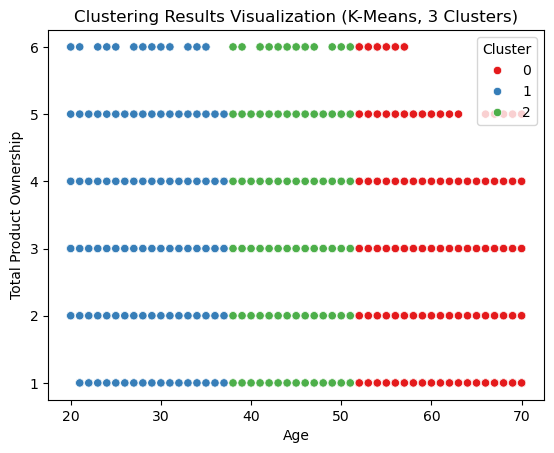

In [133]:
# Scatter plot to visualize clustering results with K-Means (3 clusters) on demographic data
sns.scatterplot(data=data0, x='Usia', y='Total_Kepemilikan_Produk', 
                hue='Clustering_KMeans_Exp1_3', palette='Set1')

plt.title('Clustering Results Visualization (K-Means, 3 Clusters)')
plt.xlabel('Age')
plt.ylabel('Total Product Ownership')
plt.legend(title='Cluster')
plt.show()

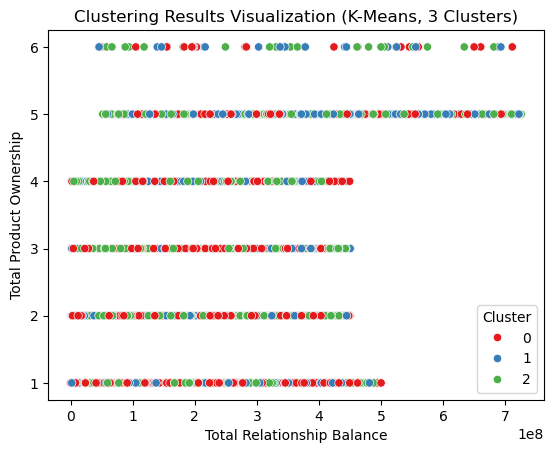

In [135]:
# Scatter plot to visualize K-Means clustering results (3 clusters)
# Plotting Total Relationship Balance vs Total Product Ownership
sns.scatterplot(data=data0, 
                x='Total_Relationship_Balance', 
                y='Total_Kepemilikan_Produk', 
                hue='Clustering_KMeans_Exp1_3', 
                palette='Set1')

plt.title('Clustering Results Visualization (K-Means, 3 Clusters)')
plt.xlabel('Total Relationship Balance')
plt.ylabel('Total Product Ownership')
plt.legend(title='Cluster')
plt.show()

In [137]:
# Calculate the average values of features for each K-Means cluster (3 clusters)
cluster_means = data0[
    [
        'Usia', 'Jumlah_Anak', 
        'Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit', 
        'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan', 
        'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk', 
        'Total_Relationship_Balance', 'Clustering_KMeans_Exp1_3'
    ]
].groupby('Clustering_KMeans_Exp1_3').mean()

cluster_means

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Total_Relationship_Balance
Clustering_KMeans_Exp1_3,,,,,,,,,,
0,58.063617,1.474844,0.688565,0.600416,0.342204,0.612474,0.170062,0.541788,2.955509,2.379434e+08
1,29.503177,1.191528,1.000000,0.592436,0.308018,0.586989,0.157337,0.599092,3.243873,2.439352e+08
2,44.974856,1.295617,0.988107,0.603126,0.333333,0.556575,0.154264,0.522936,3.158342,2.384758e+08


### Group 0

In [172]:
# Display descriptive statistics for Cluster 0 (K-Means with 3 clusters)
# Focus on selected demographic and product-related features
cluster_0_stats = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 0, 
                            ['Usia', 'Jumlah_Anak', 'Total_Kepemilikan_Produk', 'Total_Relationship_Balance']].describe(include="all")
cluster_0_stats

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2405.000000,2405.000000,2405.000000,2.405000e+03
mean,58.063617,1.474844,2.955509,2.379434e+08
std,5.298230,1.478314,1.053131,1.382820e+08
min,52.000000,0.000000,1.000000,1.028000e+03
25%,54.000000,0.000000,2.000000,1.245667e+08
50%,57.000000,1.000000,3.000000,2.322131e+08
75%,61.000000,3.000000,4.000000,3.491686e+08
max,70.000000,4.000000,6.000000,7.181097e+08


In [174]:
# Calculate the proportion of each 'Area' category within Cluster 0 (K-Means with 3 clusters)
area_proportion_cluster_0 = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 0, 'Area'].value_counts(normalize=True)
area_proportion_cluster_0

Area
Jakarta     0.482328
Bandung     0.163825
Surabaya    0.125572
Solo        0.125572
Jogja       0.074012
Bogor       0.028690
Name: proportion, dtype: float64

In [176]:
# Calculate the proportion of each 'Vintage' category within Cluster 0 (K-Means with 3 clusters)
vintage_proportion_cluster_0 = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 0, 'Vintage'].value_counts(normalize=True)
vintage_proportion_cluster_0

Vintage
2 - 3 Tahun    0.486486
< 1 Tahun      0.310603
> 4 Tahun      0.202911
Name: proportion, dtype: float64

In [178]:
# Calculate the proportion of each 'Pendidikan' (Education) level within Cluster 0 (K-Means with 3 clusters)
education_proportion_cluster_0 = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 0, 'Pendidikan'].value_counts(normalize=True)
education_proportion_cluster_0

Pendidikan
Sarjana                 0.265281
SD                      0.197089
SMA                     0.179626
Tidak Sekolah Formal    0.103950
Doktor                  0.086486
SMP                     0.083992
Magister                0.083576
Name: proportion, dtype: float64

In [180]:
# Calculate the proportion of each 'Jenis_Kelamin' (Gender) in Cluster 0 (K-Means with 3 clusters)
gender_proportion_cluster_0 = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 0, 'Jenis_Kelamin'].value_counts(normalize=True)
gender_proportion_cluster_0

Jenis_Kelamin
Laki-laki    0.672765
Perempuan    0.327235
Name: proportion, dtype: float64

### Group 1

In [182]:
# Summary statistics for Cluster 1 (K-Means with 3 clusters) on selected numeric features
summary_cluster_1 = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 1, [
    'Usia',
    'Jumlah_Anak',
    'Total_Kepemilikan_Produk',
    'Total_Relationship_Balance'
]].describe(include="all")
summary_cluster_1

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3305.000000,3305.000000,3305.000000,3.305000e+03
mean,29.503177,1.191528,3.243873,2.439352e+08
std,4.254972,1.480683,1.008655,1.452356e+08
min,20.000000,0.000000,1.000000,1.016565e+06
25%,26.000000,0.000000,3.000000,1.222784e+08
50%,30.000000,0.000000,3.000000,2.408255e+08
75%,33.000000,2.000000,4.000000,3.578412e+08
max,37.000000,4.000000,6.000000,7.228870e+08


In [184]:
# Distribution of 'Area' within Cluster 1 (K-Means with 3 clusters)
area_distribution_cluster_1 = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 1, 'Area'].value_counts(normalize=True)
area_distribution_cluster_1

Area
Jakarta     0.476248
Bandung     0.179728
Surabaya    0.126475
Solo        0.118306
Jogja       0.073222
Bogor       0.026021
Name: proportion, dtype: float64

In [186]:
# Distribution of 'Vintage' within Cluster 1 (K-Means with 3 clusters)
vintage_distribution_cluster_1 = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 1, 'Vintage'].value_counts(normalize=True)
vintage_distribution_cluster_1

Vintage
2 - 3 Tahun    0.501967
< 1 Tahun      0.293192
> 4 Tahun      0.204841
Name: proportion, dtype: float64

In [188]:
# Distribution of 'Pendidikan' (Education) within Cluster 1 (K-Means with 3 clusters)
education_distribution_cluster_1 = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 1, 'Pendidikan'].value_counts(normalize=True)
education_distribution_cluster_1

Pendidikan
Sarjana                 0.274130
SMA                     0.192436
SD                      0.180333
Doktor                  0.097731
Magister                0.087443
SMP                     0.084720
Tidak Sekolah Formal    0.083207
Name: proportion, dtype: float64

In [190]:
# Distribution of 'Jenis_Kelamin' (Gender) within Cluster 1 (K-Means with 3 clusters)
gender_distribution_cluster_1 = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 1, 'Jenis_Kelamin'].value_counts(normalize=True)
gender_distribution_cluster_1

Jenis_Kelamin
Laki-laki    0.640847
Perempuan    0.359153
Name: proportion, dtype: float64

### Group 2

In [193]:
# Summary statistics for selected numeric features in Cluster 2 (K-Means with 3 clusters)
cluster_2_stats = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 2, 
                           ['Usia', 'Jumlah_Anak', 'Total_Kepemilikan_Produk', 'Total_Relationship_Balance']].describe(include='all')
cluster_2_stats

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2943.000000,2943.000000,2943.000000,2.943000e+03
mean,44.974856,1.295617,3.158342,2.384758e+08
std,3.976996,1.474092,1.038061,1.439379e+08
min,38.000000,0.000000,1.000000,1.587496e+06
25%,42.000000,0.000000,2.000000,1.178243e+08
50%,45.000000,1.000000,3.000000,2.325173e+08
75%,48.000000,3.000000,4.000000,3.468223e+08
max,51.000000,4.000000,6.000000,7.259942e+08


In [195]:
# Calculate relative frequency of 'Area' categories in Cluster 1 (K-Means with 3 clusters)
area_distribution_cluster_1 = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 1, 'Area'].value_counts(normalize=True)
area_distribution_cluster_1

Area
Jakarta     0.476248
Bandung     0.179728
Surabaya    0.126475
Solo        0.118306
Jogja       0.073222
Bogor       0.026021
Name: proportion, dtype: float64

In [197]:
# Calculate relative frequency of 'Vintage' categories in Cluster 1 (K-Means with 3 clusters)
vintage_distribution_cluster_1 = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 1, 'Vintage'].value_counts(normalize=True)
vintage_distribution_cluster_1

Vintage
2 - 3 Tahun    0.501967
< 1 Tahun      0.293192
> 4 Tahun      0.204841
Name: proportion, dtype: float64

In [199]:
# Calculate relative frequency of 'Pendidikan' (Education) categories in Cluster 1 (K-Means with 3 clusters)
education_distribution_cluster_1 = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 1, 'Pendidikan'].value_counts(normalize=True)
education_distribution_cluster_1

Pendidikan
Sarjana                 0.274130
SMA                     0.192436
SD                      0.180333
Doktor                  0.097731
Magister                0.087443
SMP                     0.084720
Tidak Sekolah Formal    0.083207
Name: proportion, dtype: float64

In [201]:
# Calculate relative frequency of 'Jenis_Kelamin' (Gender) in Cluster 1 (K-Means with 3 clusters)
gender_distribution_cluster_1 = data0.loc[data0['Clustering_KMeans_Exp1_3'] == 1, 'Jenis_Kelamin'].value_counts(normalize=True)
gender_distribution_cluster_1

Jenis_Kelamin
Laki-laki    0.640847
Perempuan    0.359153
Name: proportion, dtype: float64

# Key Insights & Conclusion

## Executive Summary

Our analysis has successfully identified **three distinct customer segments** within FundFusion's client base.  
Although our clustering model achieved a **Silhouette Score of 0.5002** (below our target of 0.7), we've uncovered valuable **strategic insights** that can drive immediate business impact through **precisely tailored product offerings and marketing approaches**.

---

## Customer Segments Overview

| Characteristic       | Young Adults | Middle-aged Adults | Seniors       |
|----------------------|--------------|---------------------|---------------|
| **Average Age**      | 29.5 years   | 45.0 years          | 58.1 years    |
| **Total Products**   | 3.24         | 3.16                | 2.96          |
| **Relationship Balance** | Rp 243.9M | Rp 238.5M           | Rp 237.9M     |
| **Children (avg.)**  | 1.19         | 1.30                | 1.47          |
| **Savings Ownership**| 100%         | 98.81%              | 68.86%        |
| **Time Deposit**     | 59.24%       | 60.31%              | 60.04%        |
| **Credit Card**      | 30.80%       | 33.33%              | 34.22%        |
| **Home Loan**        | 58.70%       | 55.66%              | 61.25%        |
| **Vehicle Loan**     | 15.73%       | 15.43%              | 17.01%        |
| **Cash Loan**        | 59.91%       | 52.29%              | 54.18%        |

---

## Key Strategic Insights

### 1. Life Stage Drives Financial Behavior
Age — not wealth or financial sophistication — is the **primary driver** differentiating customer behavior.  
**Implication**: FundFusion should **pivot to a life-stage approach** in both product development and marketing.

### 2. Young Adults Demonstrate Exceptional Financial Engagement
- Highest **product adoption rate** (3.24 products)
- Highest **relationship balance** (Rp 243.9M)
- **100% savings account penetration**

➡️ Challenges the belief that engagement increases with age and tenure.

### 3. Critical Savings Product Gap Among Seniors
- **31.14% of seniors lack basic savings accounts**
- Significant **service gap and revenue opportunity** with low acquisition cost

### 4. Financial Capacity Is Consistent Across Age Segments
- Relationship balances are nearly equal across all segments (Rp 237-244M)  
➡️ **Tailor offerings based on life stage**, not presumed wealth.

---

## Strategic Recommendations

### 👶 For **Young Adults (Avg. 29.5 years)**

#### Wealth Growth Acceleration Platform
- Gamified investment products
- AI-powered financial advisory with peer benchmarking
- Multimedia content on long-term wealth building

#### Digital-First Experience Enhancement
- Advanced mobile UX and seamless onboarding
- Strategic API integration with lifestyle apps

#### Life Milestone Financial Solutions
- “First Home” bundle: high-yield savings + mortgage pre-approval
- “Family Foundation” bundle: education savings + insurance
- Milestone-based rewards using behavioral data

---

### 👨‍👩‍👧 For **Middle-aged Adults (Avg. 45.0 years)**

#### Family Financial Management Hub
- Education funding calculators
- Multi-generational protection plans
- Household financial dashboards with predictive features

#### Strategic Credit Optimization Program
- AI-powered debt consolidation
- Proactive refinancing alerts
- Personalized credit scoring with improvement suggestions

#### Mid-Life Value Recognition Program
- Tenure-based premium pricing and service tiers
- Strategic relationship manager assignment
- Exclusive planning events and personalized services

---

### 👵 For **Seniors (Avg. 58.1 years)**

#### Senior-Focused Savings Initiative
- "Senior Advantage" high-interest savings
- Simplified onboarding with assisted service
- Retirement income planner with withdrawal optimization

#### Comprehensive Legacy Planning Suite
- Digital estate planning and document management
- Tax-optimized intergenerational wealth transfers
- Guaranteed income + healthcare benefit products

#### Senior Experience Enhancement
- Consolidated, customizable statements
- Dedicated senior relationship managers
- Simplified and accessible digital interfaces

---

## Implementation Roadmap

### 🚀 Immediate Opportunities (0–3 months)
- Launch savings acquisition campaign for seniors
- Cross-sell cash loans to financially engaged young adults
- Roll out segmented, life-stage based marketing communication

### 📈 Medium-Term Growth Initiatives (3–12 months)
- Launch life-stage product bundles
- Upgrade digital platform with age-specific UI/UX
- Implement value-based relationship pricing

### 🔮 Long-Term Strategic Transformation (1–3 years)
- Build dynamic customer lifecycle mapping system
- Develop predictive models for life-stage transitions
- Launch fully personalized financial wellness platform

---

## Conclusion

Although the **Silhouette Score (0.5002)** was below the technical target (0.7), the model **successfully uncovered age-based segments** that offer **clear strategic direction**.  
By aligning products with each segment's **life stage needs**, FundFusion can achieve:
- Higher engagement
- Better acquisition efficiency
- Increased customer retention

The **savings gap in seniors** is an urgent opportunity, while building a **life-stage banking model** positions FundFusion as a leader in customer-centric innovation.

---

> *This analysis was conducted using K-Means clustering on demographic and product ownership data from FundFusion's customer database.*  
> *For detailed methodology and technical findings, please refer to the technical appendix.*
